In [1]:
# Rends nos tracés inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Enjolive les graphes
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv("C:/Users/namor/Dropbox/Simplon/Programmation/Pandas/Projet Groupe/Video_Games_Sales_as_at_22_Dec_2016.csv", sep=",")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


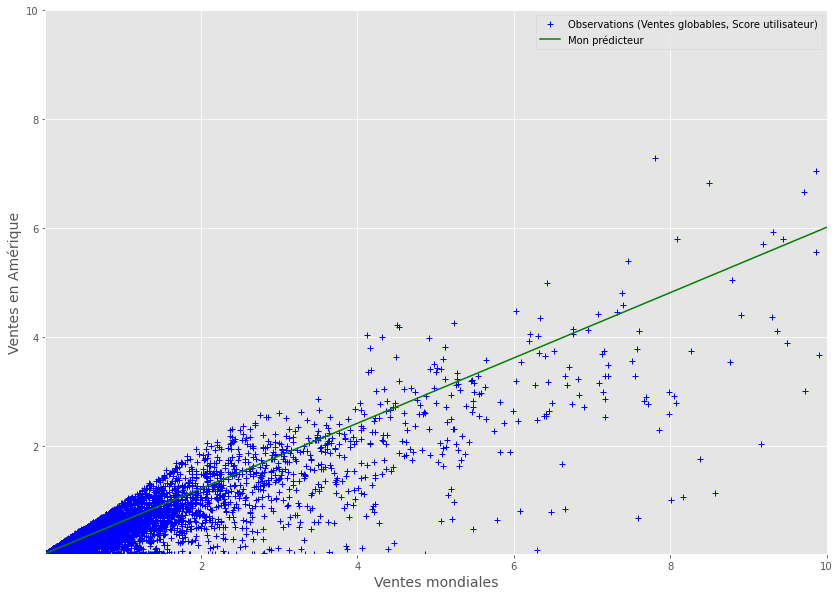

In [3]:
import matplotlib.pyplot as plt

def pred_a(x):
    a=0.6
    b=0.01
    f=[]
    for elem in x:
        f.append(a*elem+b)
    return f

#Pour tracer les predictions taille des enfants selon la taille des parents xl
xl=[0.01, 10]

fig = plt.figure(figsize=(14,10))
plt.plot(df.Global_Sales,df.NA_Sales,'+',c='blue',label='Observations (Ventes globables, Score utilisateur)')
plt.plot(xl,pred_a(xl),c='green',label='Mon prédicteur')
plt.xlabel('Ventes mondiales', fontsize=14)
plt.ylabel('Ventes en Amérique', fontsize=14)
plt.xlim(xl)
plt.ylim(xl)
plt.legend()
plt.show()

In [4]:
x=df['Global_Sales']
y=df['NA_Sales']

In [5]:
# Calcul des membres principaux de la solution a et b
# Puis calcul du a


un=len(x)*(df['Global_Sales']*df['NA_Sales']).sum()

sumx=df['Global_Sales'].sum()
sumy=df['NA_Sales'].sum()

deux=len(df['Global_Sales'])*((df['Global_Sales']*df['Global_Sales']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

0.49454595577185845

In [6]:
# Puis calcul du b
quatre=sumy*((df['Global_Sales']*df['Global_Sales']).sum())
cinq=sumx*(df['Global_Sales']*df['NA_Sales']).sum()
six=len(df['Global_Sales'])*((df['Global_Sales']*df['Global_Sales']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

-0.000531029922346321

In [7]:
a=0.49454595577185845
b=-0.000531029922346321

def pred(x,a,b):
    return a*x+b

In [8]:
import math

est_p=[pred(i,a,b) for i in x]
est_pa=pred_a(x) 

print("RMSE du meilleur predicteur selon moindre carré",math.sqrt(((pd.Series(est_p)-df['NA_Sales'])**2).sum()/len(df)))
print("RMSE du predicteur identifié analytiquement", math.sqrt(((pd.Series(est_pa)-df['NA_Sales'])**2).sum()/len(df)))

RMSE du meilleur predicteur selon moindre carré 0.2752664455578361
RMSE du predicteur identifié analytiquement 0.32692143914105415


In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['NA_Sales'], est_p))
print(rmse)

0.2752664455578361
